# Using the dataset provided by https://archive.ics.uci.edu/dataset/2/adult to make prediction whether income exceeds $50K/yr based on census data using Naive Bayesian Classifier from scratch without the use of Machine learning Liabries

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import sys
from random import randrange
from math import sqrt
from math import pi
from math import exp
from math import isnan
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data into a DataFrame using Pandas

In [2]:
# Define column names from the website
colNames = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
            "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# Load the data
df = pd.read_csv('adult.data', names = colNames)

### Understand the data

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Show the summary of numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
# Show the summery of categorical columns
for col in df.select_dtypes(include=['object']):
    display(df[col].value_counts().to_frame())

,workclass
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


,education
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646
Prof-school,576


,marital-status
Married-civ-spouse,14976
Never-married,10683
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


,occupation
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597
Handlers-cleaners,1370


,relationship
Husband,13193
Not-in-family,8305
Own-child,5068
Unmarried,3446
Wife,1568
Other-relative,981


,race
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


,sex
Male,21790
Female,10771


,native-country
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


,income
<=50K,24720
>50K,7841


### The workclass, occupation, and native-country columns consists of '?' character, which means that the value is missing or unknown. To resolve this, I created a new category called 'unknown'. However, for the native-country column, I removed the rows where the value is '?' as I feel in this context, country is an important indication of income

In [8]:
df['native-country'] = df['native-country'].str.strip()
df = df[df['native-country'] != '?']

In [9]:
df['native-country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [10]:
for col in ['workclass', 'occupation', 'native-country']:
    df.loc[:, col] = df[col].str.strip()
    df.loc[:, col] = df[col].replace('?', 'Unknown')

<ipython-input-10-09332cc573f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = df[col].str.strip()
<ipython-input-10-09332cc573f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col] = df[col].replace('?', 'Unknown')


In [11]:
for col in df.select_dtypes(include=['object']):
    display(df[col].value_counts().to_frame())

,workclass
Private,22286
Self-emp-not-inc,2499
Local-gov,2067
Unknown,1809
State-gov,1279
Self-emp-inc,1074
Federal-gov,943
Without-pay,14
Never-worked,7


,education
HS-grad,10368
Some-college,7187
Bachelors,5210
Masters,1674
Assoc-voc,1366
11th,1167
Assoc-acdm,1055
10th,921
7th-8th,627
Prof-school,559


,marital-status
Married-civ-spouse,14692
Never-married,10488
Divorced,4394
Separated,1005
Widowed,979
Married-spouse-absent,397
Married-AF-spouse,23


,occupation
Prof-specialty,4038
Craft-repair,4030
Exec-managerial,3992
Adm-clerical,3721
Sales,3584
Other-service,3212
Machine-op-inspct,1966
Unknown,1816
Transport-moving,1572
Handlers-cleaners,1350


,relationship
Husband,12947
Not-in-family,8156
Own-child,5005
Unmarried,3384
Wife,1534
Other-relative,952


,race
White,27430
Black,3028
Asian-Pac-Islander,956
Amer-Indian-Eskimo,311
Other,253


,sex
Male,21370
Female,10608


,native-country
United-States,29170
Mexico,643
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95
England,90


,income
<=50K,24283
>50K,7695


### Plot the distribution of the 'income' variable, which is the target, you can see that the target is biased towards '<=50k'

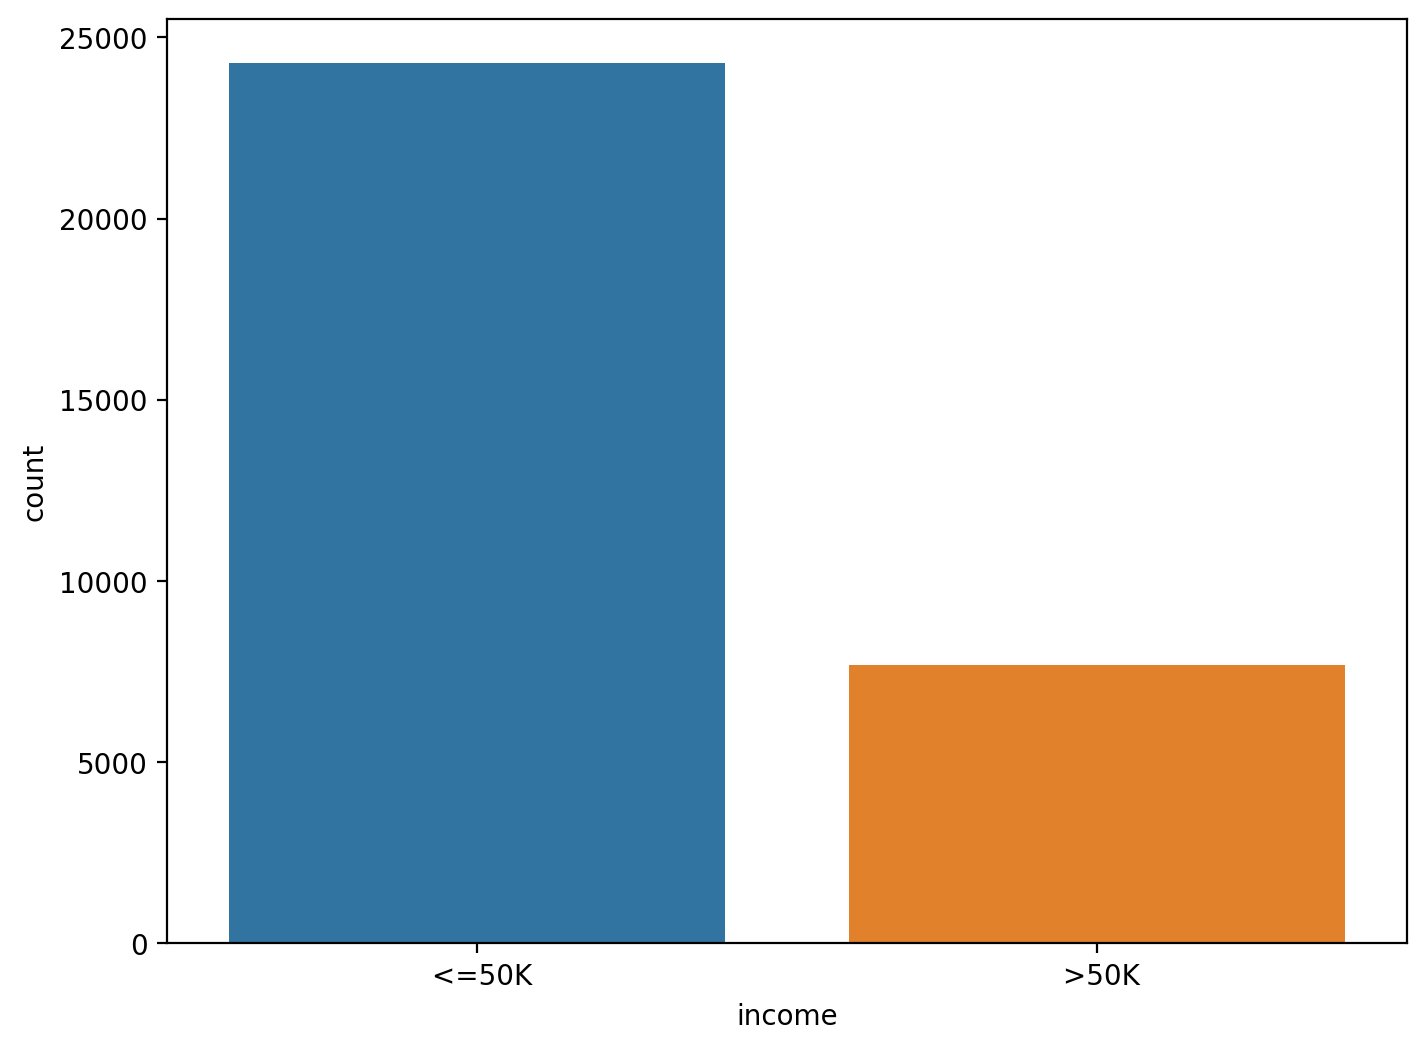

In [12]:
plt.figure(figsize=(8, 6), dpi=200)
sns.countplot(data=df,x='income')
plt.show()

### Plot graph for numerical variables

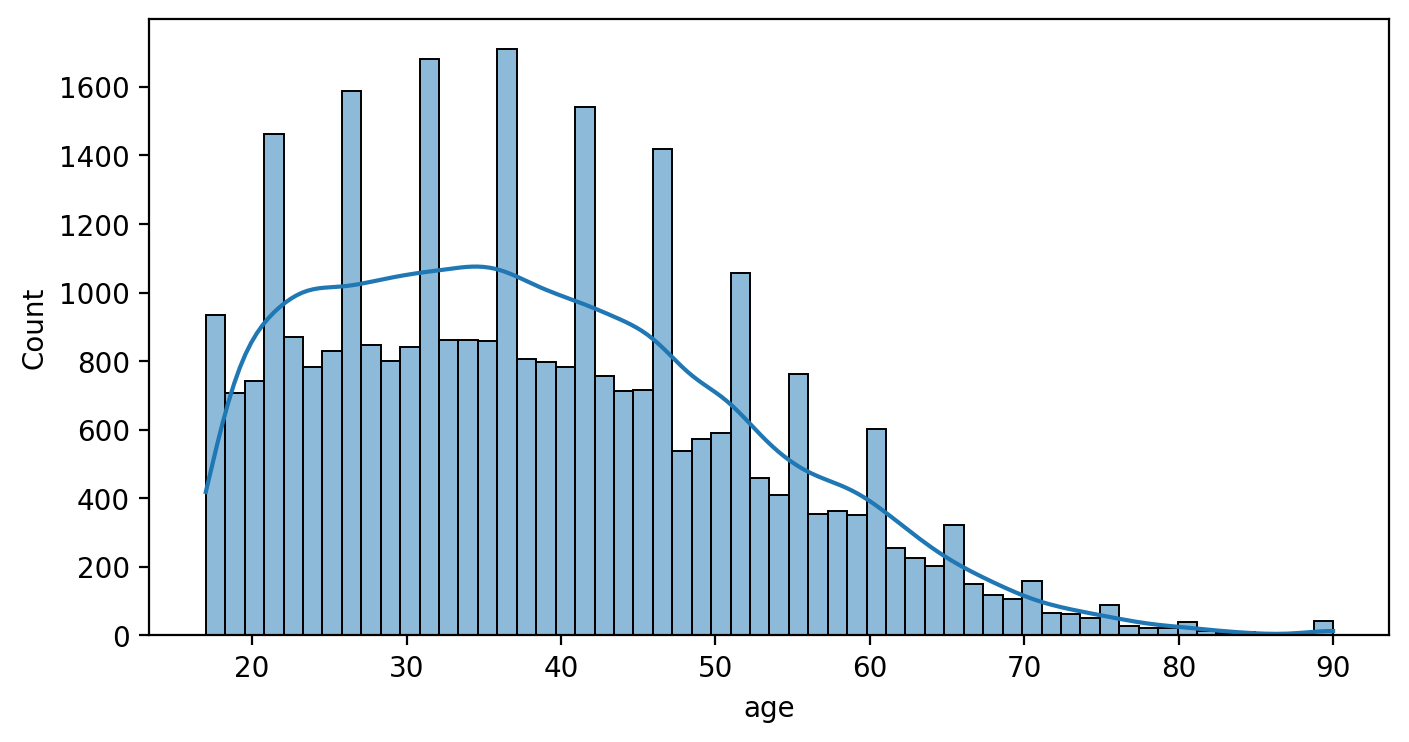

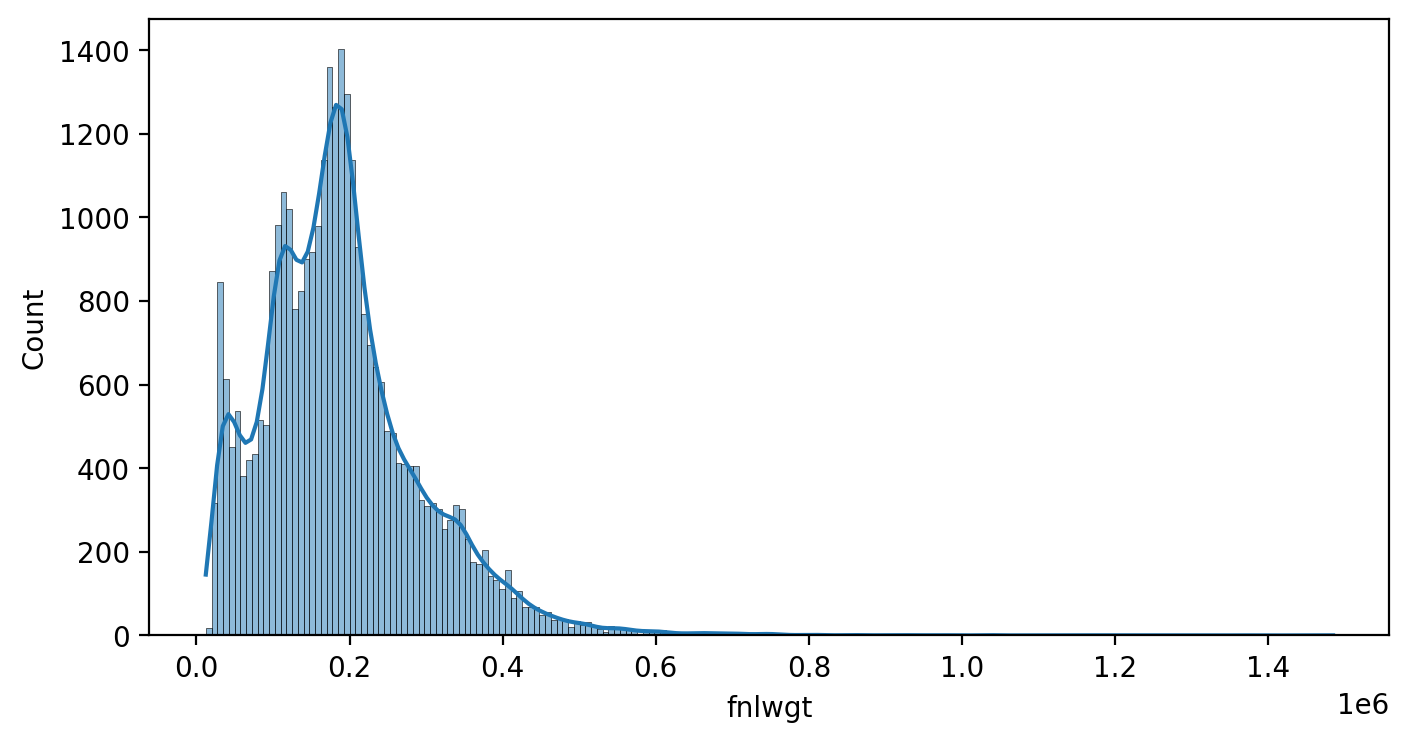

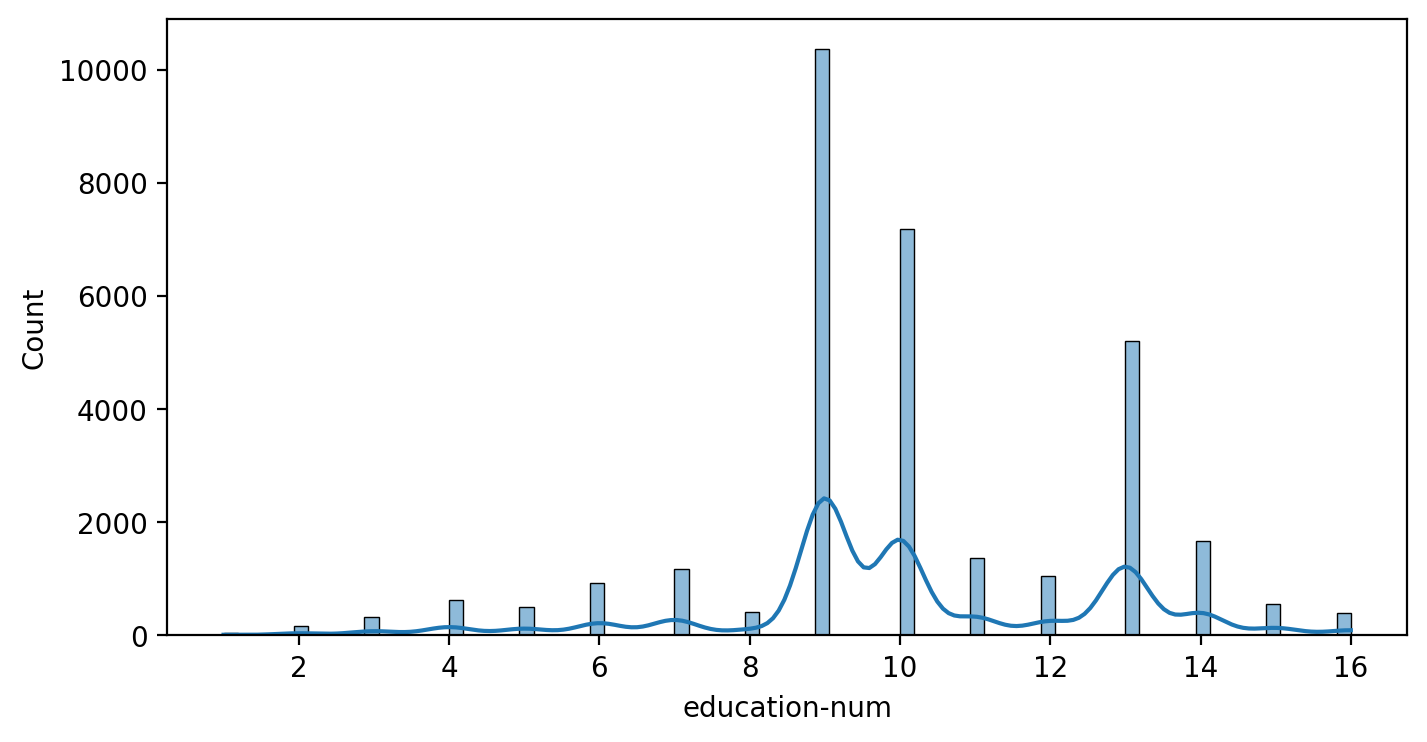

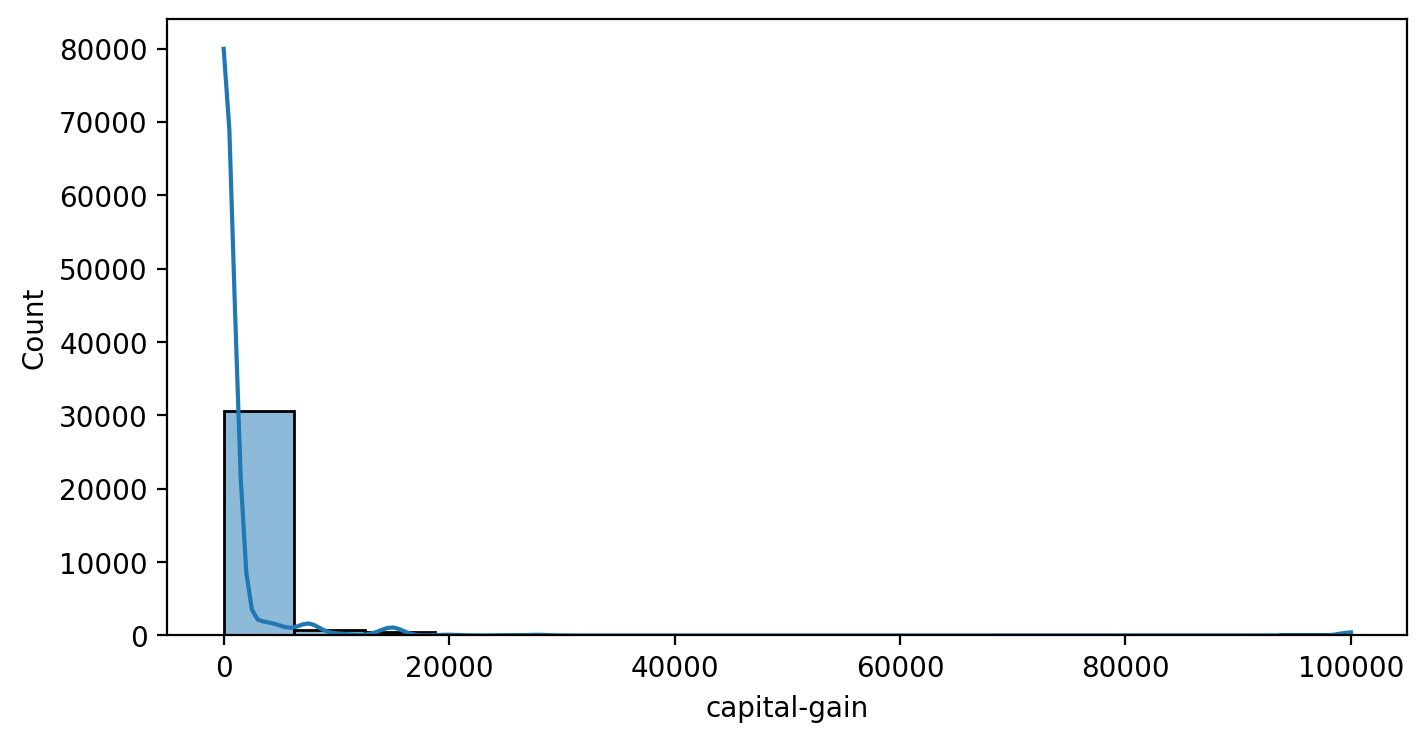

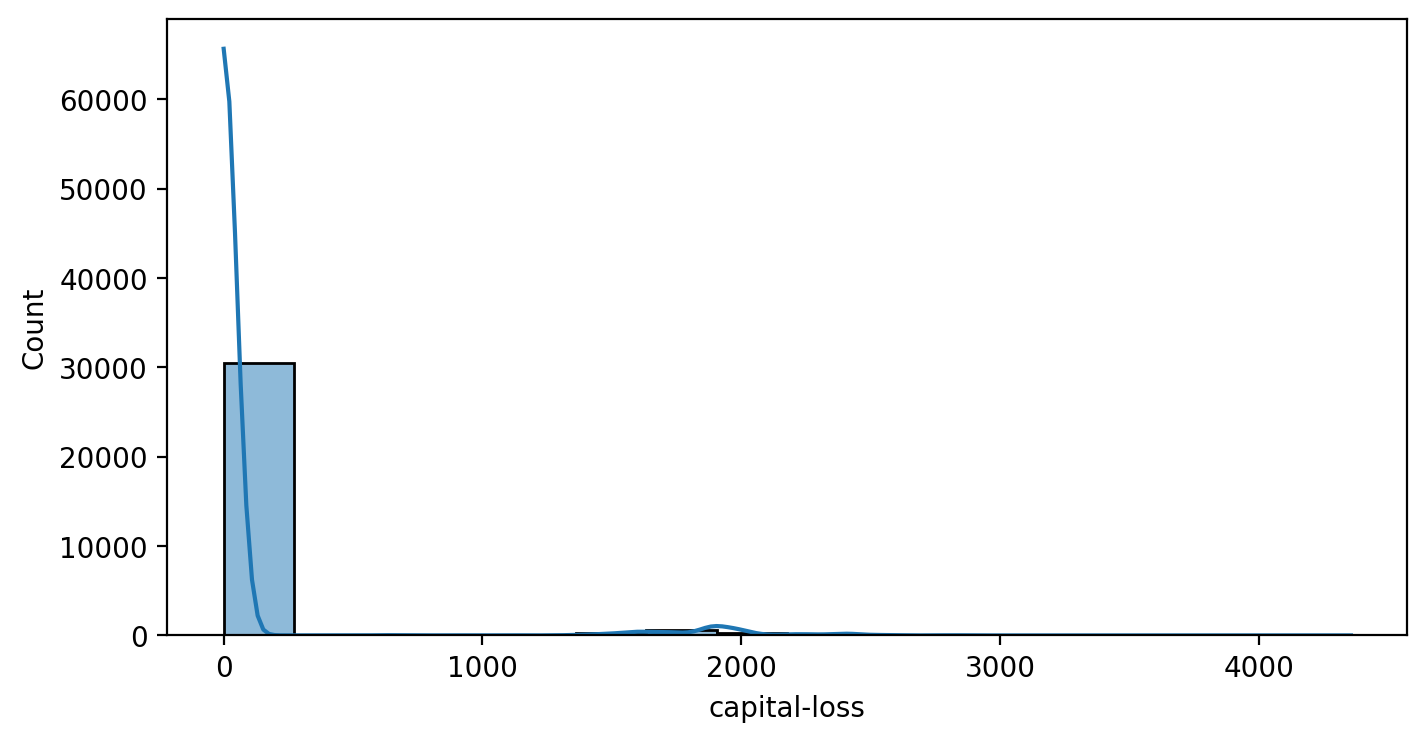

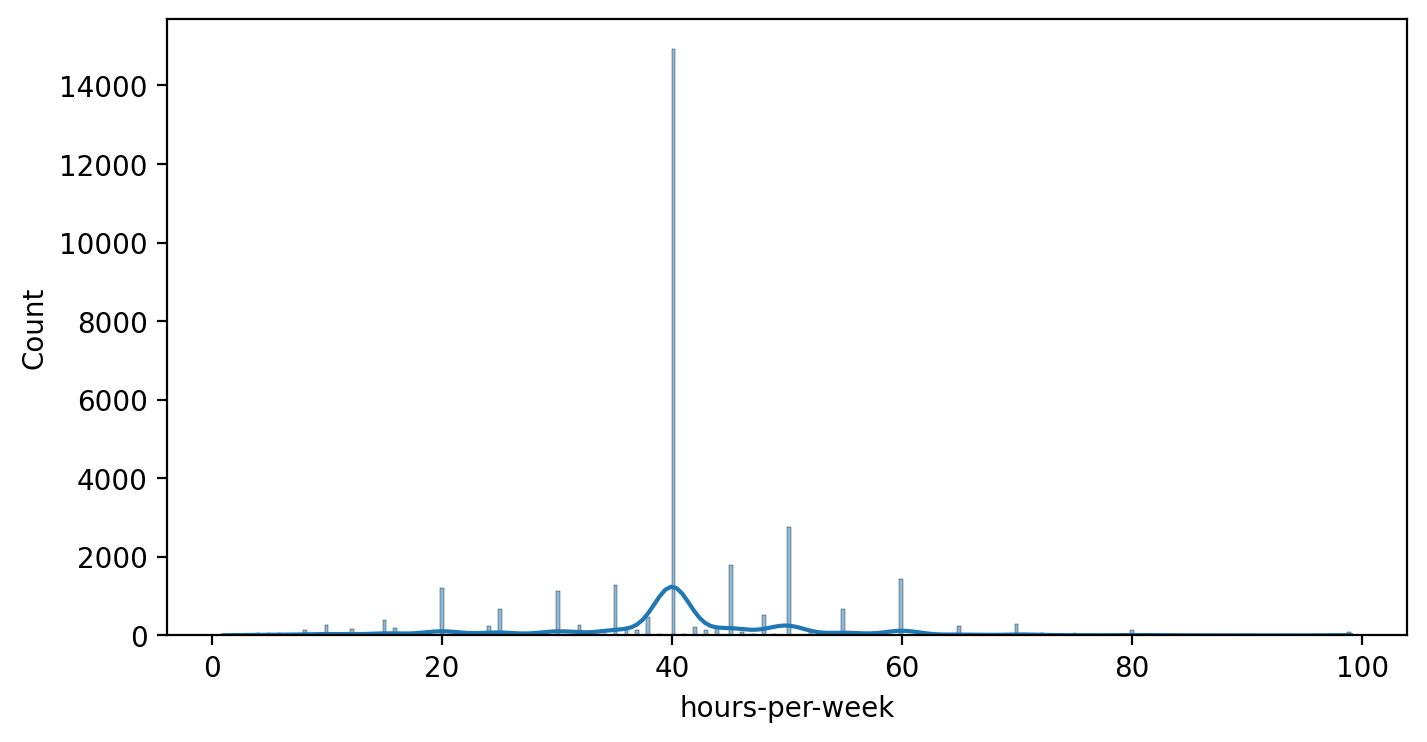

In [13]:
# for every column that is numerical
for col in df.select_dtypes(include=['int64', 'float64']):
    plt.figure(figsize=(8, 4), dpi=200)
    sns.histplot(data=df, x=col, kde=True)
    plt.show()

### Plot the distribution of categorical variables

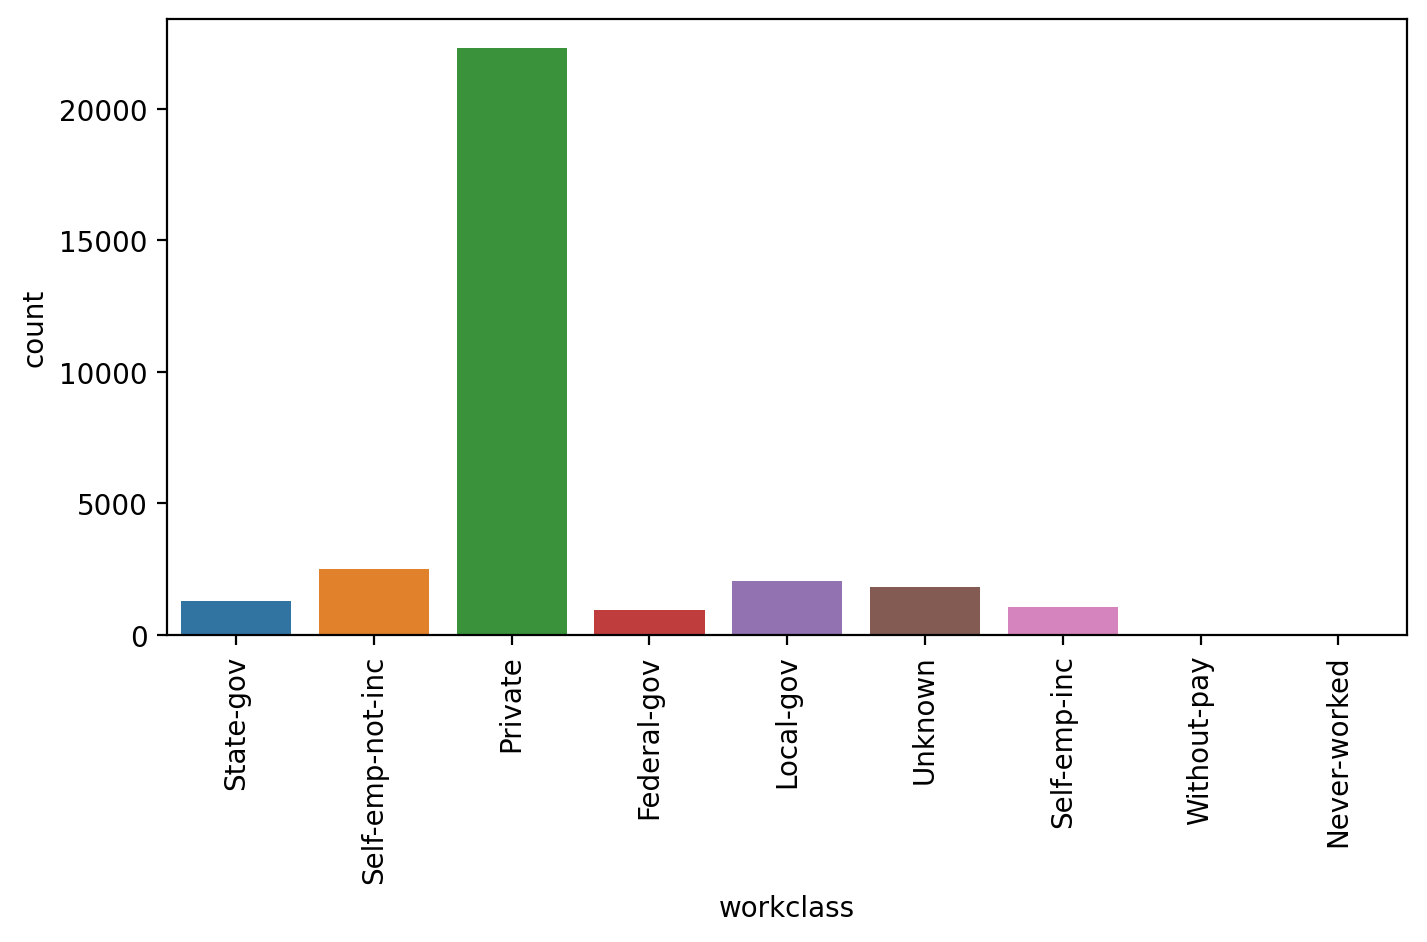

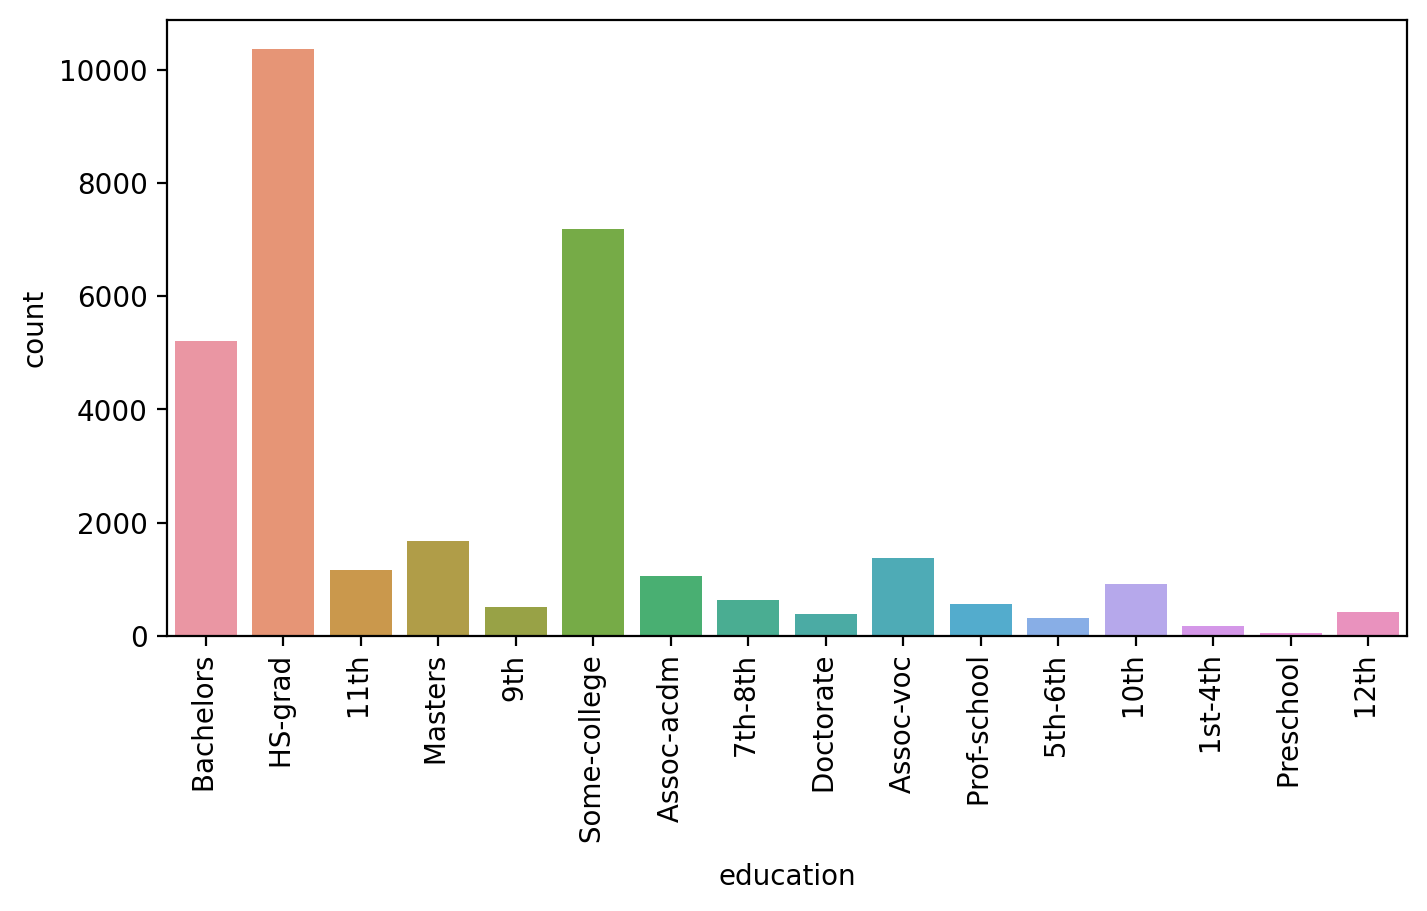

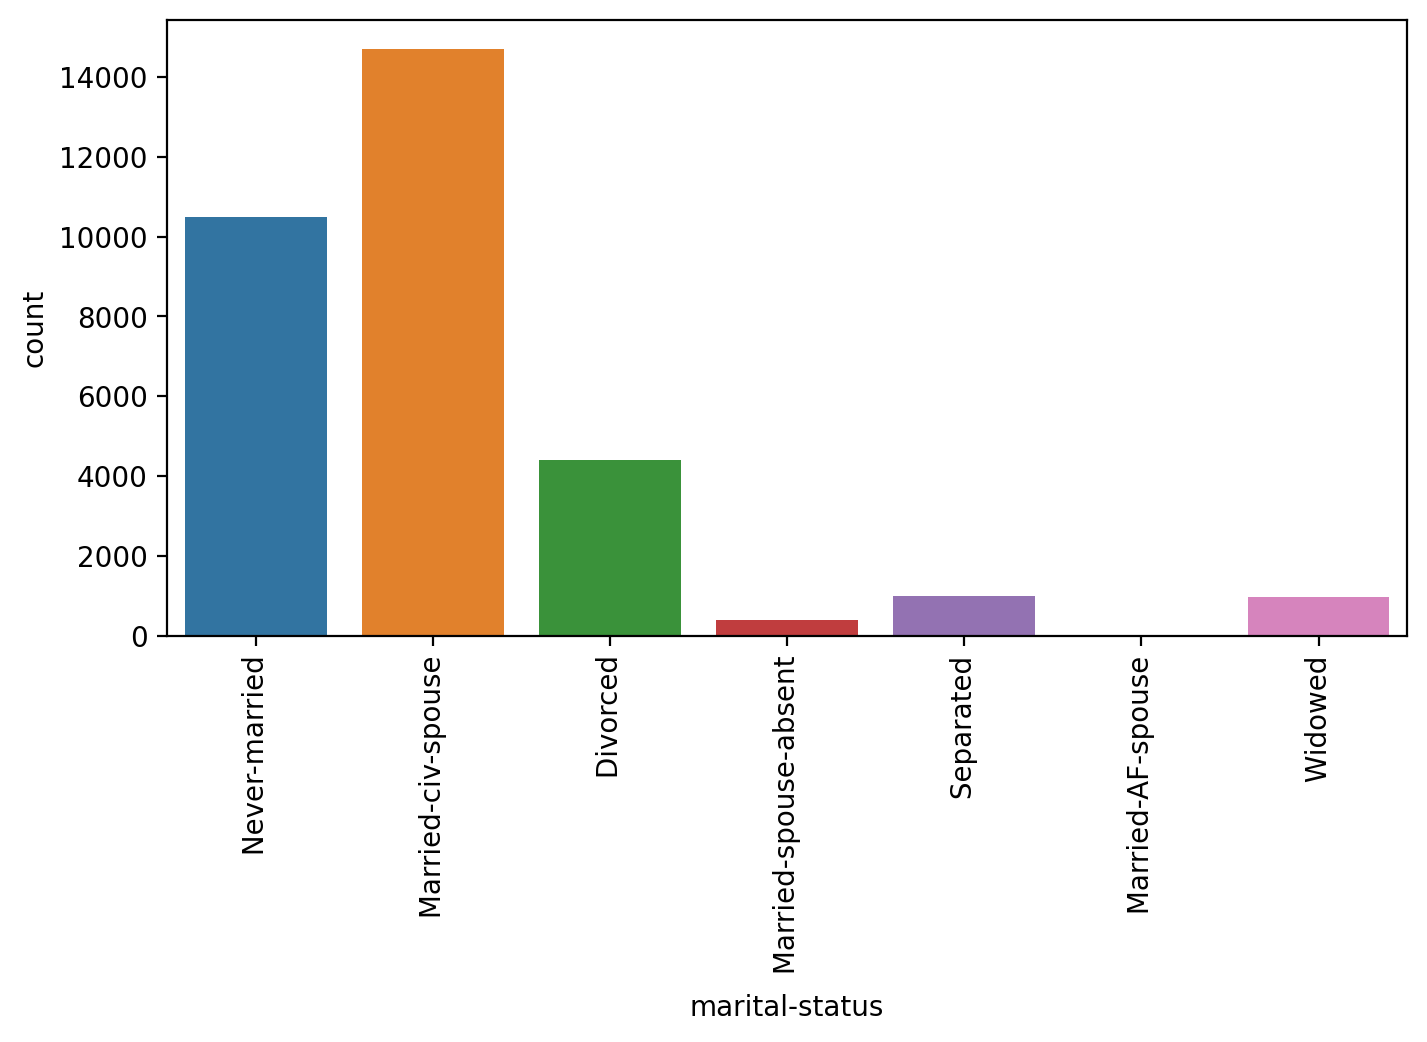

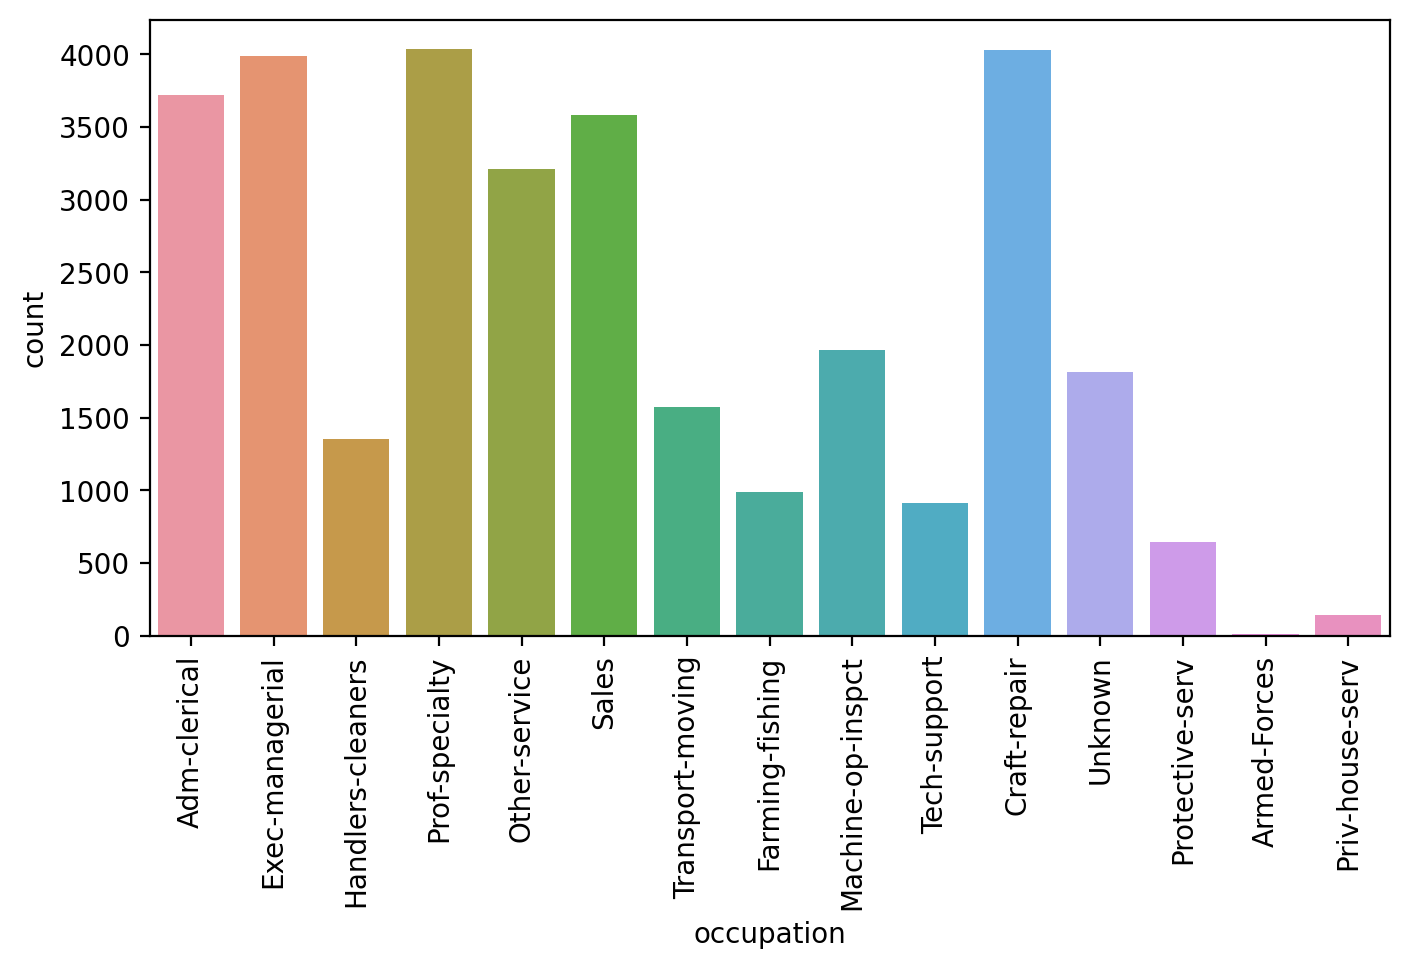

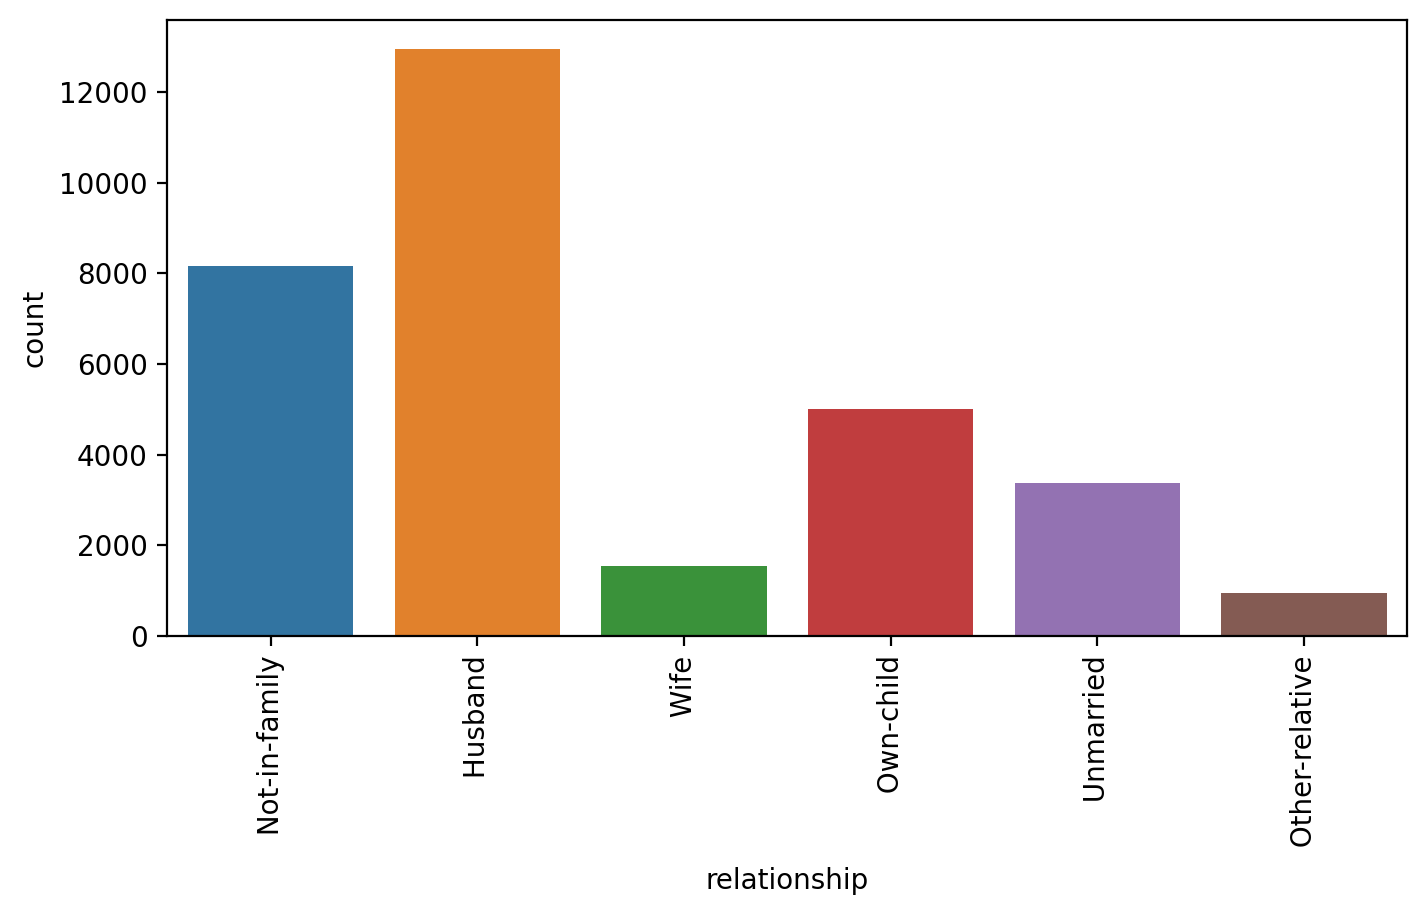

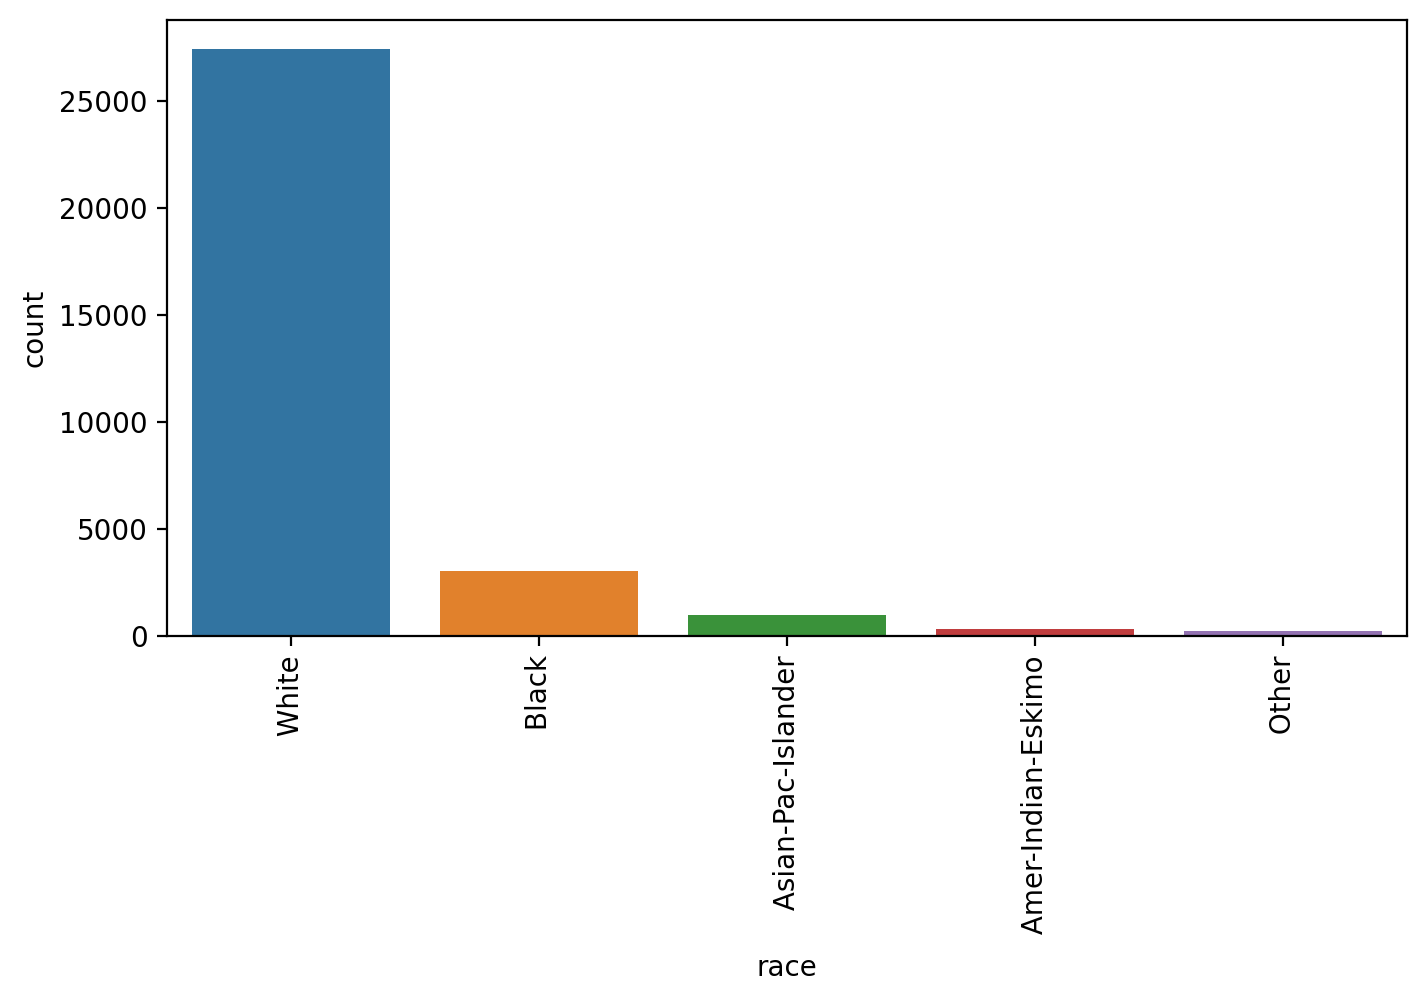

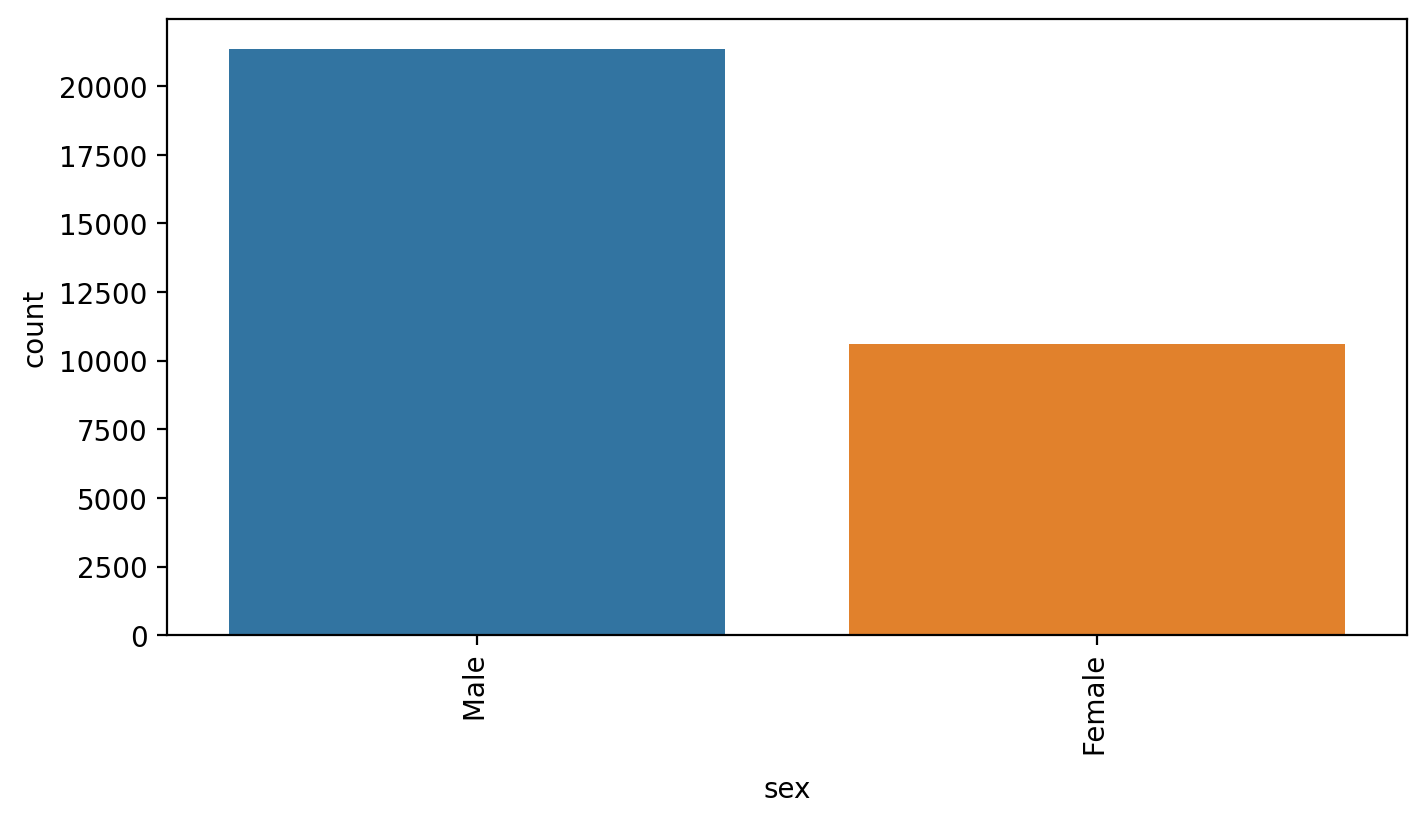

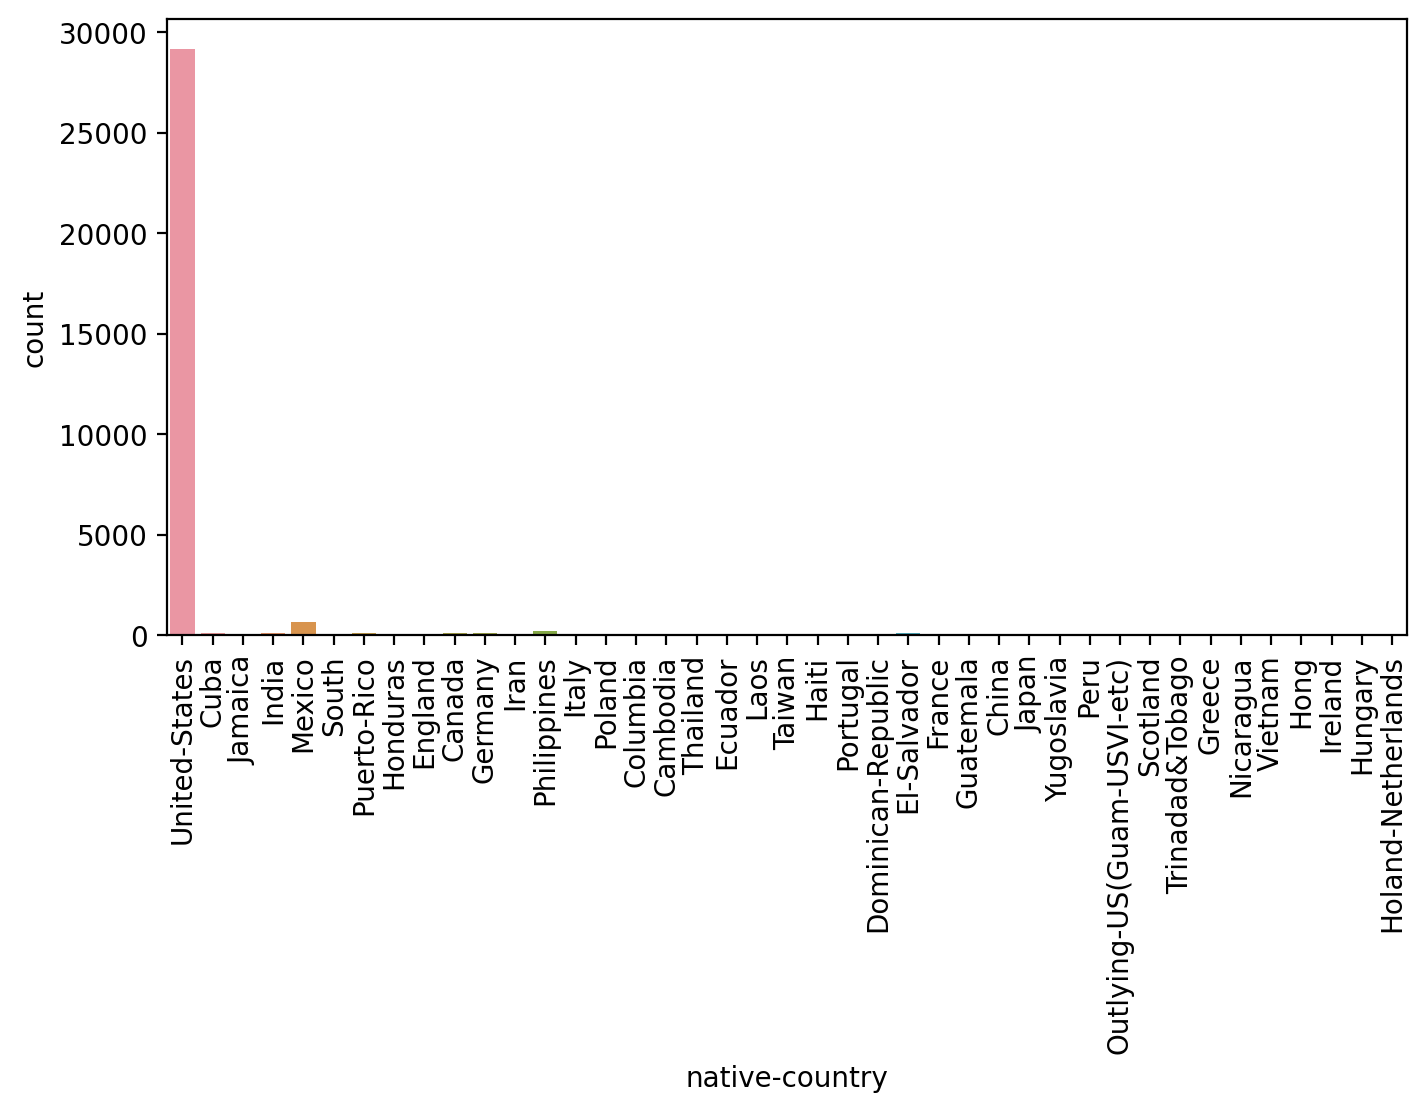

In [14]:
# for every column that is categorical
for col in df.select_dtypes(include=['object']):
    if col != 'income':
        plt.figure(figsize=(8, 4),dpi=200)
        sns.countplot(data=df,x=col)
        plt.xticks(rotation=90)
        plt.show()

### Other data insights

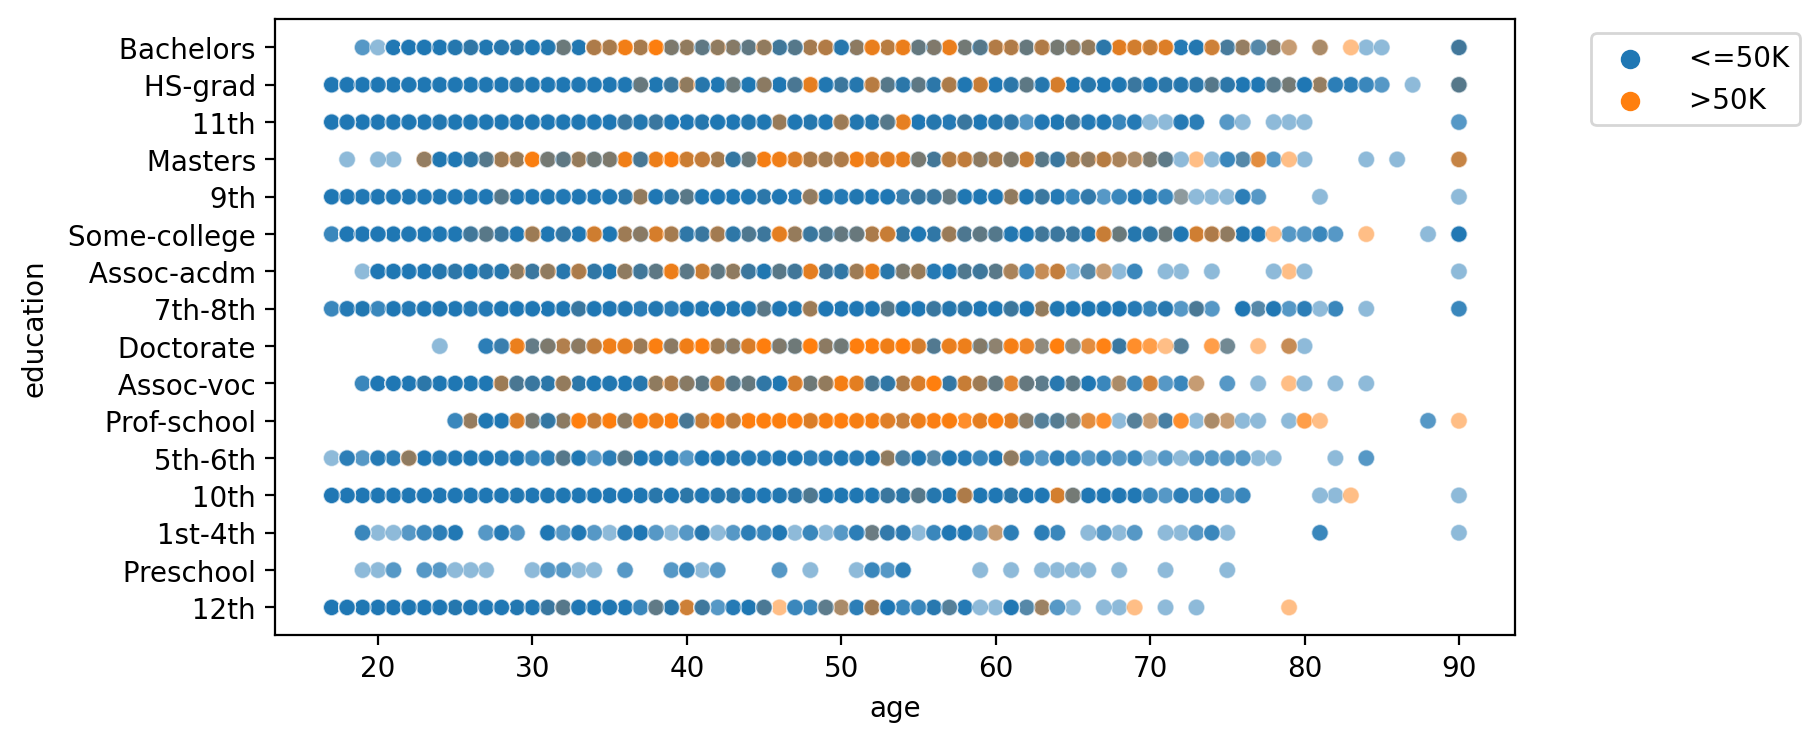

In [15]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=df,x='age',y='education', hue='income',alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

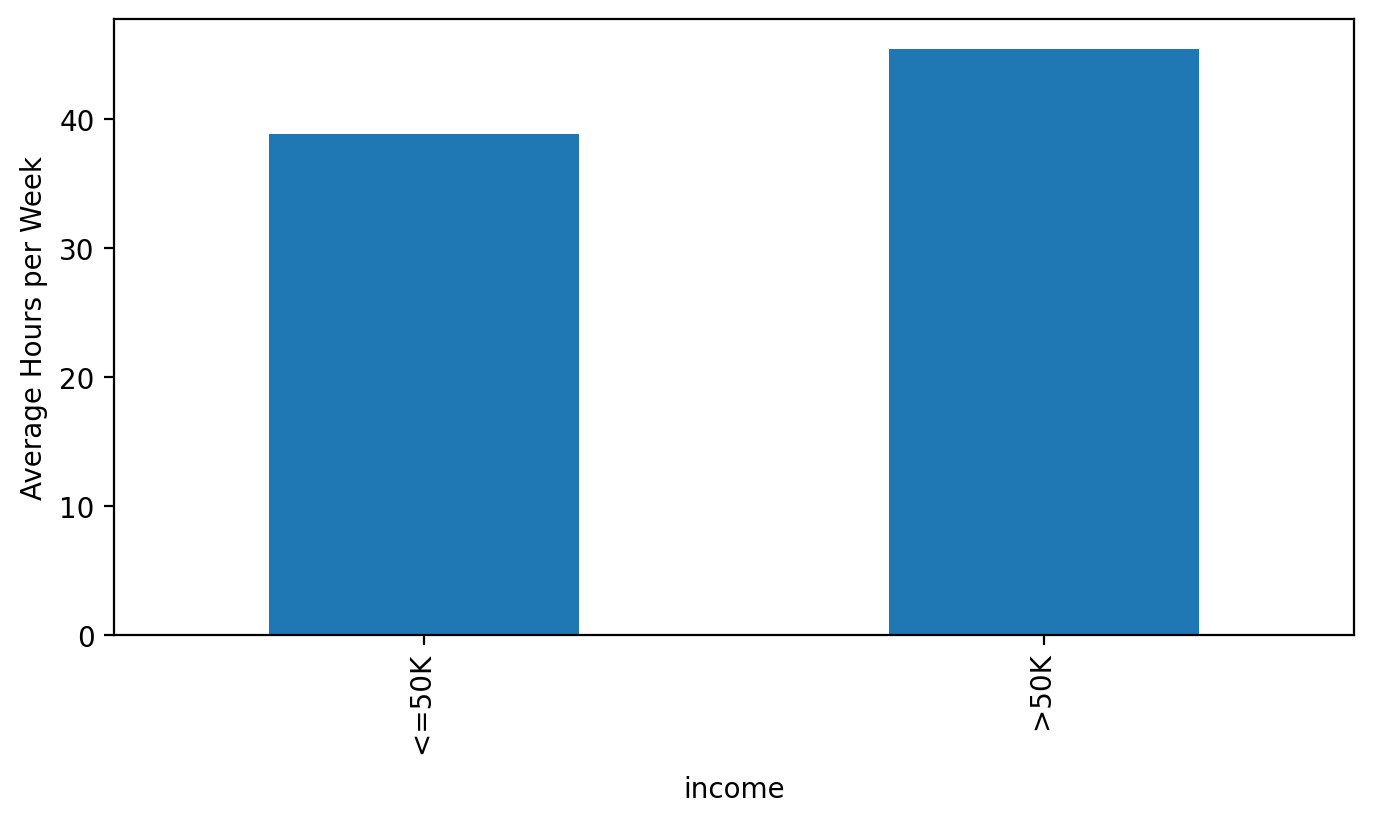

In [16]:
plt.figure(figsize=(8,4),dpi=200)
df.groupby('income')['hours-per-week'].mean().plot(kind='bar')
plt.ylabel('Average Hours per Week')
plt.show()

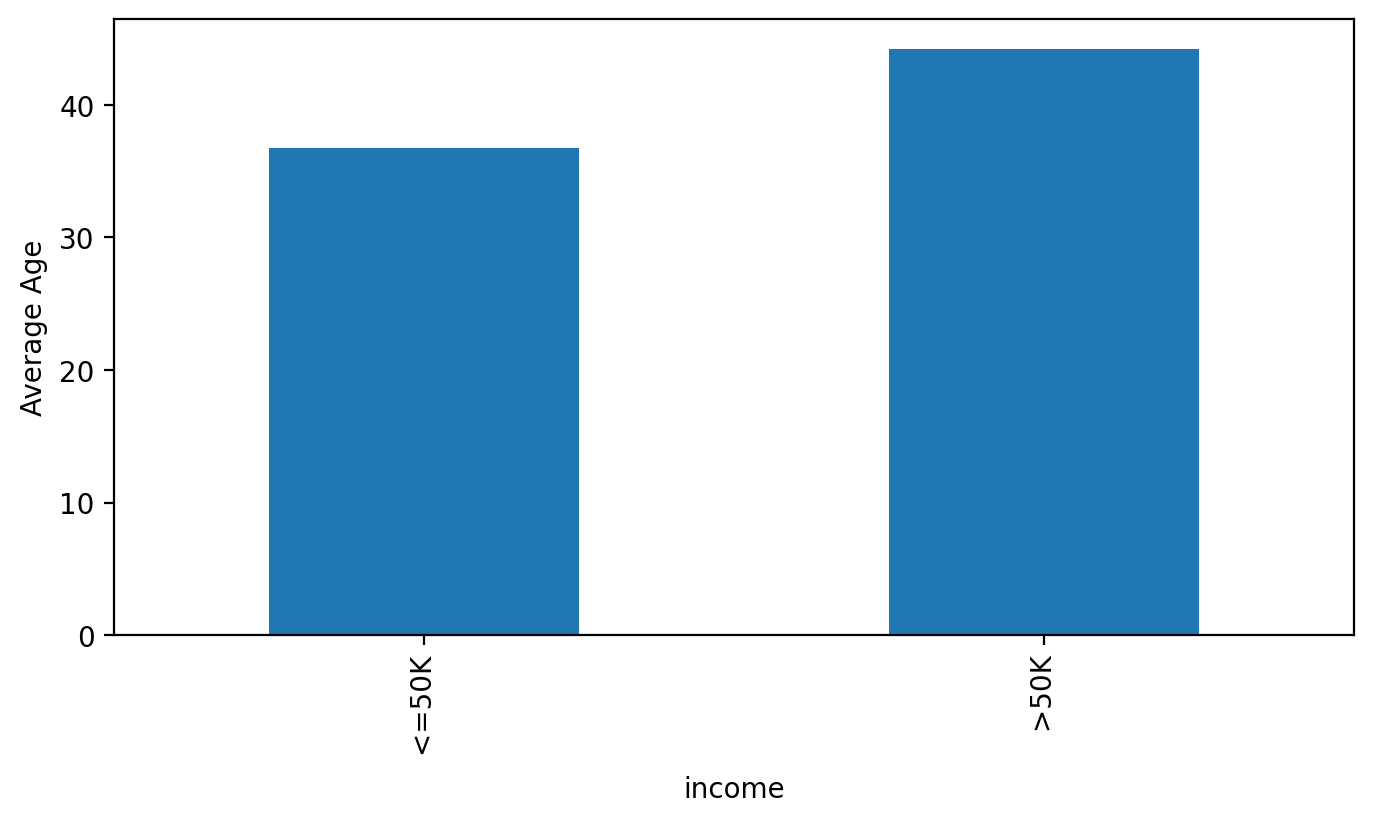

In [17]:
plt.figure(figsize=(8,4),dpi=200)
df.groupby('income')['age'].mean().plot(kind='bar')
plt.ylabel('Average Age')
plt.show()

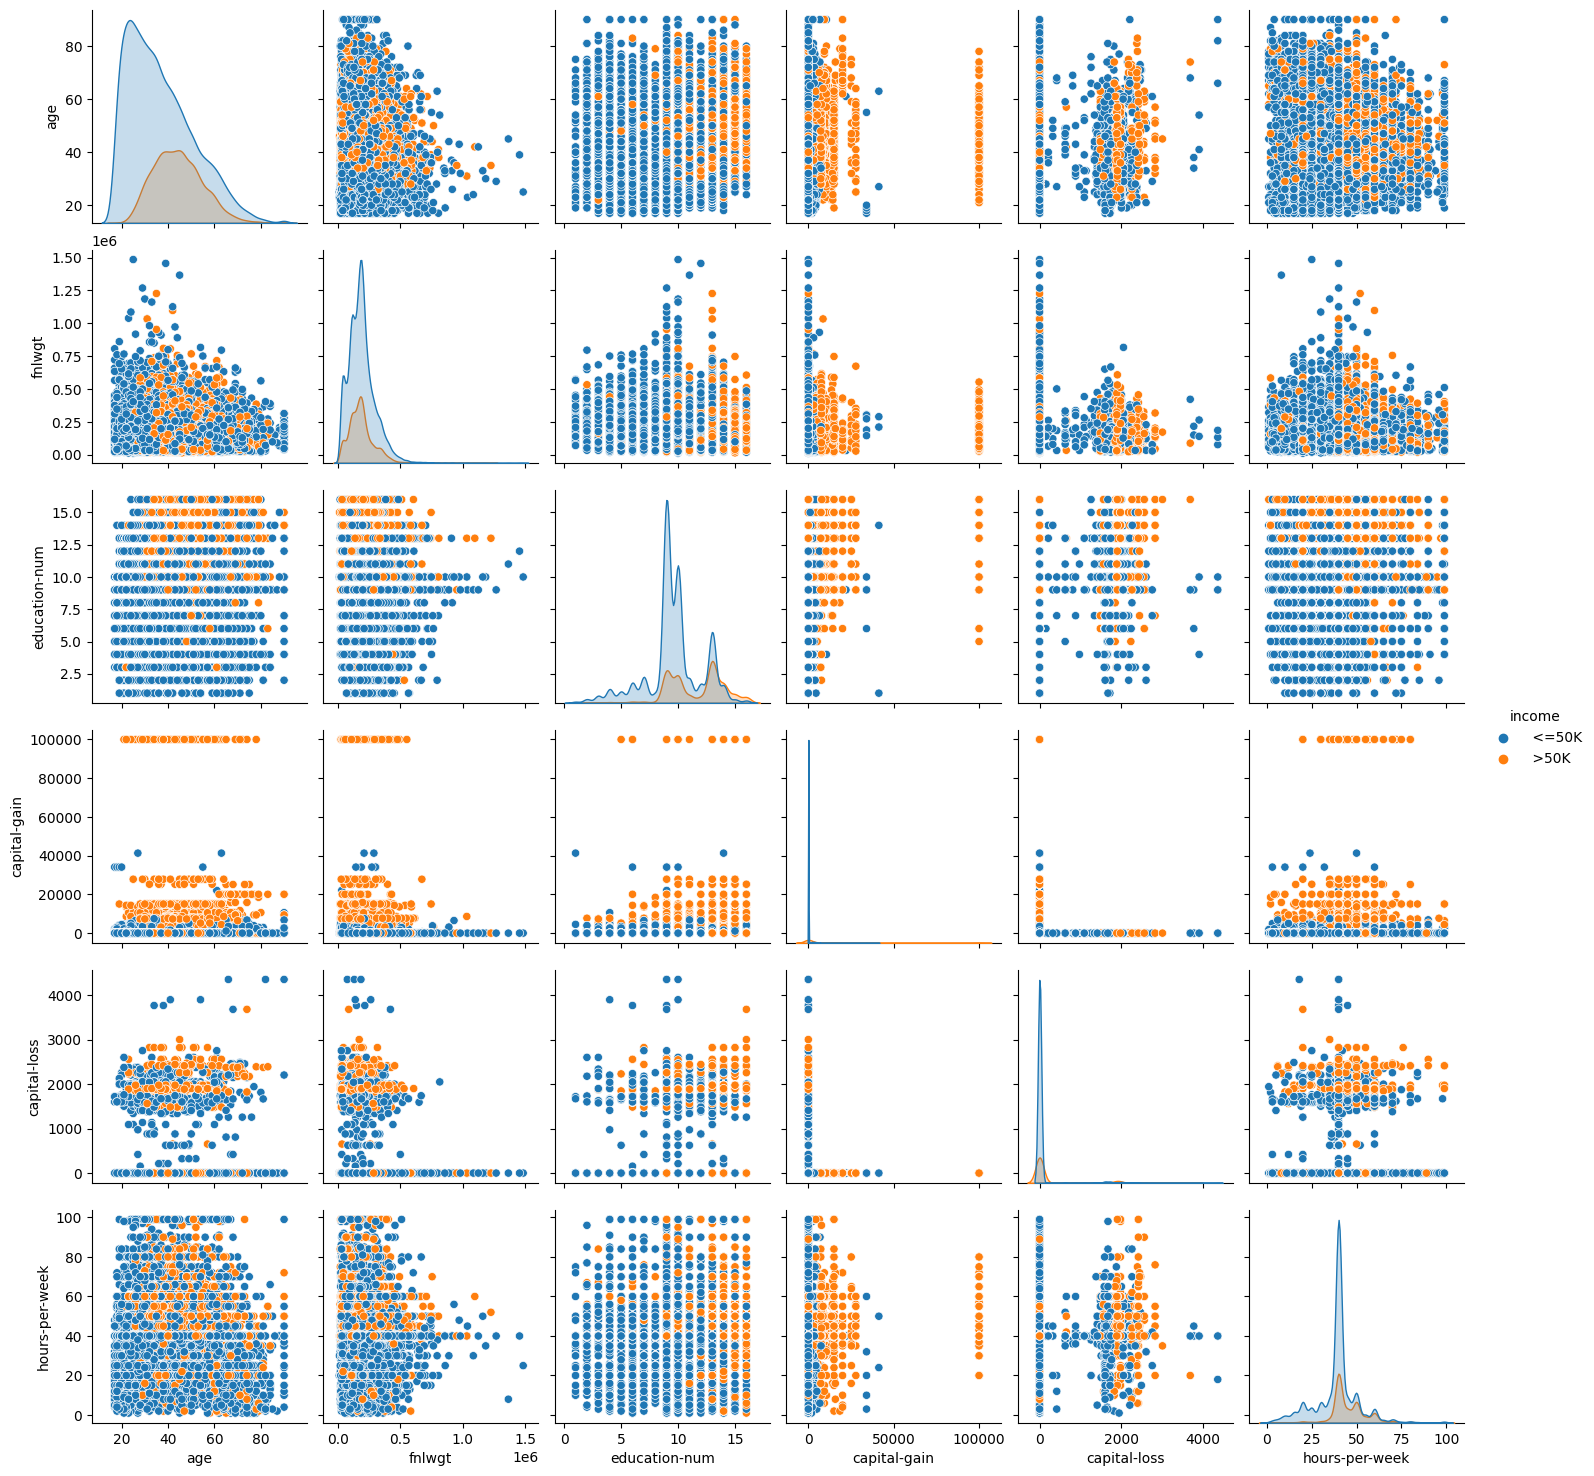

In [18]:
sns.pairplot(df, hue='income')

<ipython-input-19-3bdf5992d61e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


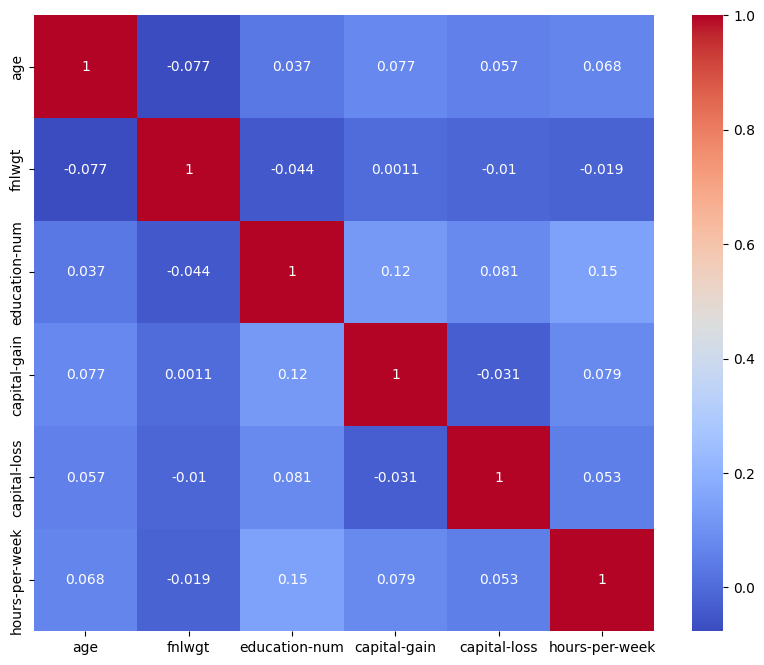

In [19]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show();

### Write function to encode categorical columns

In [20]:
def encodeCategorical(df):
    for column in df.columns:
        if df[column].dtype == object:
            newdf = pd.Series(df[column], dtype = "category")
            df[column] = newdf.cat.codes
    return df

In [21]:
encodeCategorical(df)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31978 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             31978 non-null  int64
 1   workclass       31978 non-null  int8 
 2   fnlwgt          31978 non-null  int64
 3   education       31978 non-null  int8 
 4   education-num   31978 non-null  int64
 5   marital-status  31978 non-null  int8 
 6   occupation      31978 non-null  int8 
 7   relationship    31978 non-null  int8 
 8   race            31978 non-null  int8 
 9   sex             31978 non-null  int8 
 10  capital-gain    31978 non-null  int64
 11  capital-loss    31978 non-null  int64
 12  hours-per-week  31978 non-null  int64
 13  native-country  31978 non-null  int8 
 14  income          31978 non-null  int8 
dtypes: int64(6), int8(9)
memory usage: 2.0 MB


### Function to normalize the DataFrame

In [23]:
def normalize_column(df, column):
    mean = df[column].mean()
    std_dev = df[column].std()
    df[column] = (df[column] - mean) / std_dev

def normalize_df(df):
    for column in df.columns:
        if column != 'income':
            normalize_column(df, column)

In [24]:
normalize_df(df)

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,31978.0,6.399284e-17,1.000000,-1.579482,-0.774334,-0.115577,0.689571,3.763772
workclass,31978.0,2.266413e-17,1.000000,-2.322564,-0.224100,-0.224100,-0.224100,3.273341
fnlwgt,31978.0,-4.460612e-17,1.000000,-1.678205,-0.681897,-0.107847,0.450836,12.248611
education,31978.0,1.208754e-16,1.000000,-2.659420,-0.336216,0.180051,0.438185,1.212586
education-num,31978.0,-1.977557e-17,1.000000,-3.542528,-0.418343,-0.027819,0.753227,2.315320
marital-status,31978.0,6.110428e-18,1.000000,-1.729812,-0.404070,-0.404070,0.921672,2.247415
occupation,31978.0,5.732692e-17,1.000000,-1.480710,-0.788406,-0.096102,0.826971,1.750043
relationship,31978.0,-1.977557e-17,1.000000,-0.900920,-0.900920,-0.278427,0.966561,2.211548
race,31978.0,2.866346e-16,1.000000,-4.375307,0.388073,0.388073,0.388073,0.388073
sex,31978.0,5.999329e-17,1.000000,-1.419315,-1.419315,0.704543,0.704543,0.704543


### Write function for stratified sampling which splits the DataFrame into training and test sets

In [27]:
def trainTestSplit(data, testSize):
    # Converting the test size (ratio) into numbers of rows
    if isinstance(testSize, float):
        testSize = round(testSize * len(data))

    # Getting the index of the data from the dataset
    dataIndex = data.index.tolist()

    # Generate random indexes to split the dataset
    testIndex = random.sample(population = dataIndex, k = testSize)

    # Allocate the testing set according to the random indexes (testIndex)
    testSet = data.loc[testIndex]

    # Dropping the testset rows from the original data set, and make the remaining rows as the training set
    trainSet = data.drop(testIndex)

    # Return the train and test set data
    return trainSet, testSet

In [28]:
# split into training and testing set with testing set being 30 percent
train_df, test_df = trainTestSplit(df, 0.3)

In [29]:
train_df.size

335775

In [30]:
test_df.size

143895

### Function for Gaussian Naive Bayes

In [31]:
# Calculate the Gaussian probability distribution for continuous features
# To prevent numerical underflow, when the exponent underflows is out of Pythons' float precision, set
# exponent to the smallest possible float value by the system
# To prevent the zero frequency/count problem, the function catches occurences of 0/null standard deviation
# and returns the probability of 1/number of observations

def calculateGaussianProbability(x, mean, stdev, totalRows):
    if stdev == 0 or isnan(stdev):
        return 1/totalRows # if stdev is 0, return the probability of "Add one count"

    exponent = exp(-((x - mean)**2 / (2 * stdev**2 )))

    if exponent == 0:
        # Set exponent to smallest possible float supported by the system
        exponent = sys.float_info.min

    return (1 / (sqrt(2 * pi) * stdev)) * exponent

### Function to calculate probability for categorical features

In [32]:
def calculateProbability(x, X1, count1, X2, count2, classCount, totalRows):
    if x == X1:
        # If zero frequency occurs, add 1 to count and return the probability
        if count1/classCount == 0:
            return 1/totalRows

        return count1/classCount
    else:
        # If zero frequency occurs, add 1 to count and return the probability
        if count2/classCount == 0:
            return 1/totalRows

        return count2/classCount


### Function to calculate class probability

In [33]:
def calculateClassProbabilities(summaries, row):

    # Get the length of the dataset
    # Sum up all the counts of each label class
    totalRows = sum([summaries[label][0][2] for label in summaries])

    # Instantiate a dictionary to store probability of each label class for a given row
    probabilities = dict()

    # Get the class value: classValue
    # Get the summaries for each class: classSummaries
    for classValue, classSummaries in summaries.items():

        # Get the probability of each label class e.g., If class label 1 has a length of 12345
        # and length of dataset is 234567 then this probability is 12345/234567
        probabilities[classValue] = summaries[classValue][0][2]/float(totalRows)

        #looping through each summaries
        for i in range(len(classSummaries)):
            # if categorical feature
            if len(classSummaries[i]) > 3:
                X1, count1, X2, count2, classCount = classSummaries[i]
                probabilities[classValue] = \
                probabilities[classValue] * calculateProbability(row[i], X1, count1, X2, count2, classCount, totalRows)
            # if continuous feature
            else:
                mean, stdev, _ = classSummaries[i]
                probabilities[classValue] = \
                probabilities[classValue] * calculateGaussianProbability(row[i], mean, stdev, totalRows)

    return probabilities

### Function for predicting the class

In [34]:
def predictClass(summaries, row):
    # Storing the probabilities by calling the method
    probabilities = calculateClassProbabilities(summaries, row)

    # Initializing the variables
    bestLabel, bestProb = None, -1

    # Looping through to find the best label with the best probability
    for classVal, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classVal
    return bestLabel

### Function to get summary dictionary of the DataFrame

In [35]:
def summarizeDataset(data):
    # Creating a empty dict to store the target class
    summaries = {}
    # For loop to loop the target column that are unique
    for i in data.iloc[:,-1].unique():
        # listing the feature variable of each unique class
        feature = []
        # looping through all the feature variable except the target column
        for j in range(len(data.columns)-1):
            # Storing the size of unique values in a variable
            uniqueValueSize = len(data.iloc[:,j].unique())

            # If categorical feature
            if(uniqueValueSize < 10):
                aList = list()
                # Creating a subset for each class
                df = data[data.iloc[:,-1] == i]

                # looping through the categorical feature for unique vals
                for k in data.iloc[:,j].unique():
                    # storing the unique value and counting the val
                    aList.append(k)
                    aList.append(len(df[df.iloc[:,j] == k]))
                feature.append(tuple([aList[0], aList[1], aList[2], aList[3], len(data[data.iloc[:,-1] == i])]))
            # else continuous feature
            else:
                feature.append((data[data.iloc[:,-1] == i].mean(axis = 0)[j], \
                                data[data.iloc[:,-1] == i].std(axis = 0)[j], len(data[data.iloc[:,-1] == i])))
        # storing the summaries
        summaries[i] = feature
    return summaries

### Function for Naive Bayesian Classifier

In [37]:
def naiveBayesian(train_df, test_df):
    # Method to get the summary
    summary = summarizeDataset(train_df)

    # Creating an empty list
    predictions = list()

    # looping through the test set values
    for row in test_df.values:
        output = predictClass(summary, row)
        predictions.append(output)

    return(predictions)

### Function to determine Regression metrics

In [38]:
def accuracy(predictions, dataSet):
    yTest = list(dataSet.iloc[:,-1])
    correctCount = 0
    sumError = 0.0
    rsmeError = 0.0
    for i in range(len(yTest)):
        if predictions[i] == yTest[i]:
            correctCount += 1
        sumError += abs(predictions[i] - yTest[i])
        predictionError = abs(predictions[i] - yTest[i])
        rsmeError = (predictionError**2)

    print(f'Number of exact matches in predictions: {correctCount}/{len(yTest)}')
    print(f'Mean Squared Error(MSE): {np.square(np.subtract(yTest,predictions)).mean()}')
    print(f'Root Mean Squared Error (RMSE): {sqrt(rsmeError/float(len(yTest)))}')
    print(f'Mean Absolute Error(MSE): {sumError/float(len(yTest))}')

    return (round(correctCount/len(dataSet)*100,3))

### Test the model on the training dataset

In [40]:
pred = naiveBayesian(train_df, train_df)
print('Accuracy of prediction for training set:', accuracy(pred, train_df))

Number of exact matches in predictions: 18074/22385
Mean Squared Error(MSE): 0.19258431985704713
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Error(MSE): 0.19258431985704713
Accuracy of prediction for training set: 80.742


### Test the model on the test dataset

In [41]:
testPred = naiveBayesian(train_df, test_df)
print('Accuracy of prediction for testing set:', accuracy(testPred, test_df))

Number of exact matches in predictions: 7796/9593
Mean Squared Error(MSE): 0.1873240904826436
Root Mean Squared Error (RMSE): 0.0
Mean Absolute Error(MSE): 0.1873240904826436
Accuracy of prediction for testing set: 81.268
